<a href="https://colab.research.google.com/github/kushal-h/Deep-Learning-Implementations/blob/master/Self%20Organizing%20Maps/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

****
@Author: Kushal H
****

##Install MiniSom Package

In [5]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.7-cp36-none-any.whl size=8607 sha256=fc03ddd00db1cb0cd833890b05b7bd05bb8da0ac6b0feb1a20d134b712036140
  Stored in directory: /root/.cache/pip/wheels/db/9a/af/0fca4ced67fec66c00998c4bf55b13f0a4c882ee775f278862
Successfully built MiniSom


### Importing the libraries


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [10]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [6]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


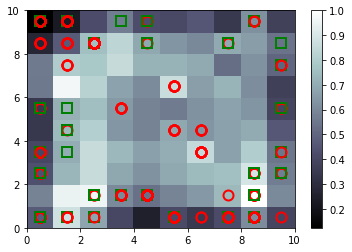

In [16]:
from pylab import bone, pcolor, colorbar, plot, show
bone() #initialization of the map (windows which contains map)
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [20]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(2,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [21]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15786237
15767358
15567839
15671014
15579583
15642336
15740487
15811742
15702571
15622083
15646190
15715907
15768342
15748532
15689692
15672357
15788634
15766183
15608595
15772329
15734649
15646082
15717629
15604536
15635598
15647191
15793896
